<a href="https://colab.research.google.com/github/kgpark88/ems/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 심층신경망(DNN, Deep Neural Network)
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
카테고리 데이터, 더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

### ① 라이브러리 임포트

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

### ② 데이터 로드
###  데이터 설명 : 해외 통신사 고객이탈정보 데이터셋
- customerID: 고객ID
- gender: 고객 성별
- SeniorCitizen: 고객이 노약자인가 아닌가
- Partner: 고객에게 파트너가 있는지 여부(결혼 여부)
- Dependents: 고객의 부양 가족 여부
- tenure: 고객이 회사에 머물렀던 개월 수
- PhoneService: 고객에게 전화 서비스가 있는지 여부
- MultipleLines: 고객이 여러 회선을 사용하는지 여부
- InternetService: 고객의 인터넷 서비스 제공업체
- OnlineSecurity: 고객의 온라인 보안 여부
- OnlineBackup: 고객이 온라인 백업을 했는지 여부

In [4]:
df = pd.read_csv('telco_churn_data.csv')

### ③ 데이터 분석

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


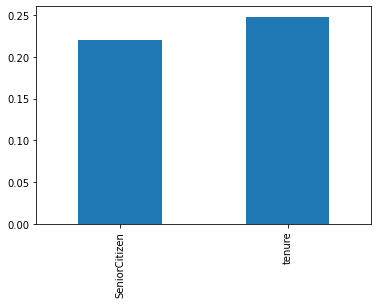

In [8]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

### ④ 데이터 전처리

In [9]:
df.drop('customerID', axis=1, inplace=True)

In [10]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [12]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 더미 특성 생성

In [13]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']

In [14]:
dummies = pd.get_dummies(df[cols], drop_first=True)

In [15]:
df = df.drop(cols, axis=1)

In [16]:
df = pd.concat([df, dummies], axis=1)

In [17]:
# df = pd.get_dummies(df)
# cols = list(df.select_dtypes('object').columns)

### ⑤ Train, Test  데이터셋 분할

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [21]:
X_train.shape

(4930, 30)

In [22]:
y_train.shape

(4930,)

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 모델 입력갯수, 출력갯수 확인

In [25]:
X_train.shape

(4930, 30)

In [26]:
y_train.shape

(4930,)

### ⑦ 모델 개발

In [27]:
model = Sequential()

# input layer
model.add(Dense(64, activation='relu', input_shape=(30,)))

# hidden layer
model.add(Dense(64, activation='relu'))

# hidden layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

### 모델 구성 -  과적합 방지

In [28]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

### 모델 확인

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [30]:
hidden1 = model.layers[0]

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
print(weights)

[[ 0.16910802  0.05256371  0.07545669 ...  0.03192014  0.1820784
   0.0621831 ]
 [-0.02444942  0.14528094  0.02709848 ... -0.01324511 -0.1416045
   0.11566113]
 [-0.0682876   0.17980088 -0.00387047 ...  0.04659373  0.08483385
  -0.06540814]
 ...
 [-0.00100175  0.14916815  0.10626151 ... -0.13543259 -0.19177237
   0.02081874]
 [-0.19100673 -0.1345967   0.17874093 ... -0.02533686 -0.05749062
  -0.16764845]
 [ 0.11740695  0.15464364 -0.03235297 ...  0.03747731 -0.10142018
  -0.15114416]]


In [33]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### 모델 컴파일 – 이진 분류 모델

In [34]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc']) 

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) 하기

In [35]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=10)

Epoch 1/20
493/493 [==============================] - 2s 3ms/step - loss: 0.5224 - acc: 0.7320 - val_loss: 0.4501 - val_acc: 0.7785
Epoch 2/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4818 - acc: 0.7598 - val_loss: 0.4470 - val_acc: 0.7937
Epoch 3/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4787 - acc: 0.7655 - val_loss: 0.4756 - val_acc: 0.7818
Epoch 4/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4637 - acc: 0.7838 - val_loss: 0.4622 - val_acc: 0.7979
Epoch 5/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4547 - acc: 0.7803 - val_loss: 0.4378 - val_acc: 0.7946
Epoch 6/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4591 - acc: 0.7880 - val_loss: 0.4485 - val_acc: 0.7979
Epoch 7/20
493/493 [==============================] - 1s 3ms/step - loss: 0.4520 - acc: 0.7892 - val_loss: 0.4335 - val_acc: 0.7989
Epoch 8/20
493/493 [==============================] - 1s 3ms/step - loss: 0.

### 모델 훈련(학습) - 조기종료

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=25)

In [38]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min', 
                              save_best_only=True)

In [39]:
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
243/247 [============================>.] - ETA: 0s - loss: 0.4295 - acc: 0.8058
Epoch 00001: val_loss improved from inf to 0.42715, saving model to best_model.h5
247/247 [==============================] - 1s 4ms/step - loss: 0.4294 - acc: 0.8059 - val_loss: 0.4272 - val_acc: 0.7989
Epoch 2/50
247/247 [==============================] - ETA: 0s - loss: 0.4268 - acc: 0.8037
Epoch 00002: val_loss improved from 0.42715 to 0.42337, saving model to best_model.h5
247/247 [==============================] - 1s 4ms/step - loss: 0.4268 - acc: 0.8037 - val_loss: 0.4234 - val_acc: 0.8022
Epoch 3/50
235/247 [===========================>..] - ETA: 0s - loss: 0.4289 - acc: 0.8026
Epoch 00003: val_loss did not improve from 0.42337
247/247 [==============================] - 1s 4ms/step - loss: 0.4264 - acc: 0.8037 - val_loss: 0.4271 - val_acc: 0.8036
Epoch 4/50
237/247 [===========================>..] - ETA: 0s - loss: 0.4220 - acc: 0.8074
Epoch 00004: val_loss did not improve from 0.42337
247

### ⑧ 모델 성능 평가

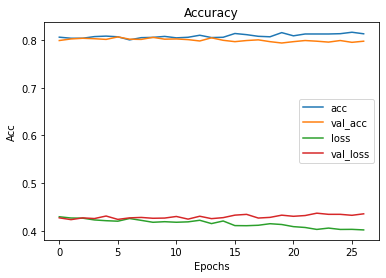

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'])
plt.show()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.65      0.56      0.60       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [44]:
print(confusion_matrix(y_test,predictions))

[[1366  173]
 [ 255  319]]
